# Stroke Prediction Classification - Veri Madenciliği Proje Ödevi
Bu çalışmanın amacı, felç (stroke) geçirme riski taşıyan bireyleri sınıflandırma yöntemleriyle tespit etmektir. Acil servis senaryolarında erken tanı hayati önem taşıdığı için, modelin temel önceliği gerçek felç vakalarını mümkün olduğunca yüksek oranda yakalayabilmektir. Bu nedenle pozitif sınıf için recall metriği öncelikli olarak ele alınmıştır. Başka bir deyişle, model bir bireyi felç olarak sınıflandırdığında, bu tahminin güvenilir olmasına önem verilmiştir.

Kullanılan veri seti, felç şüphesiyle acil servise başvuran bireylerden oluşmaktadır. Ancak vakaların yalnızca yaklaşık %5’i gerçek felç vakasıdır. Bu durum veri setini ciddi biçimde dengesiz (imbalanced) hâle getirmekte ve nadir görülen pozitif sınıfın doğru tespitini daha kritik kılmaktadır.

Bu veri seti, daha önce Viyana Teknik Üniversitesi’ndeki stajım sırasında Barcelona’daki bir hastaneye ait gerçek klinik verilerle çalışma deneyimimle benzer bir sağlık problemine sahip olduğu için tercih edilmiştir. Böylece, farklı bir veri kaynağında benzer bir tahmin problemini analiz ederek önceki klinik veri tecrübemi pekiştirmek ve aradaki farklılıkları keşfetmek amaçlanmıştır.

Veri Seti: Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/)

! Bu veri seti daha önce farklı çalışmalarda kullanılmış olsa da, bu çalışmada farklı model karşılaştırmaları yapılmıştır.

## Genel Bilgiler
Felç (stroke), beyne giden kan akışının azalması veya tamamen kesilmesi sonucu beyin hücrelerinin hasar görmesiyle ortaya çıkan ciddi bir tıbbi durumdur. Temel olarak iki türü bulunmaktadır: iskemik felç, beyne giden damarların tıkanmasıyla; hemorajik felç ise beyin içinde veya çevresinde meydana gelen kanama sonucunda oluşur. Her iki durumda da beynin ilgili bölgelerinde kalıcı fonksiyon kayıpları görülebilir.

Dünya Sağlık Örgütü’ne (WHO) göre felç, dünya genelinde ölüm nedenleri arasında ikinci sırada yer almakta ve tüm ölümlerin yaklaşık %11’inden sorumludur. Her yıl milyonlarca insan felç nedeniyle hayatını kaybetmekte veya kalıcı sağlık sorunlarıyla yaşamını sürdürmektedir. Gelişmiş ülkelerde felç vakalarında azalma gözlemlenirken, gelişmekte olan ülkelerde artış eğilimi dikkat çekmektedir.

Felcin en önemli risk faktörü yüksek tansiyondur. Bunun yanı sıra sigara kullanımı, obezite, diyabet, yüksek kolesterol, atriyal fibrilasyon ve geçirilmiş geçici iskemik atak (TIA) gibi faktörler felç riskini önemli ölçüde artırmaktadır. CDC verilerine göre, yetişkin bireylerin büyük bir kısmı bu risk faktörlerinden en az birine sahiptir.

Bu risk faktörlerinin yaygınlığı, felç riskinin önceden tahmin edilmesine yönelik makine öğrenimi modellerinin geliştirilmesini hem gerekli hem de anlamlı kılmaktadır.

Kaynaklar:
1. Wikipedia – Stroke
2. CDC – Stroke Facts

## **Veri Setine Temel Düzeyde Bakış**

Bu veri seti, cinsiyet, yaş, çeşitli hastalık durumları ve sigara kullanımı gibi girdilere dayanarak bir hastanın felç (stroke) geçirip geçirmeyeceğini tahmin etmek amacıyla kullanılmaktadır. Verideki her bir satır, bir hastaya ait ilgili bilgileri içermektedir.

## **Özellik (Attribute) Bilgileri**

Veri seti toplam **5110 gözlem** ve **12 değişkenden** oluşmaktadır:

* **id:** Her hastaya atanmış benzersiz kimlik numarası.
* **gender:** “Male”, “Female” veya “Other”.
* **age:** Hastanın yaşı.
* **hypertension:** Yüksek tansiyon durumu.

  * 0 → Hastada hipertansiyon yok
  * 1 → Hastada hipertansiyon var
* **heart_disease:** Kalp hastalığı durumu.

  * 0 → Hastada kalp hastalığı yok
  * 1 → Hastada kalp hastalığı var
* **ever_married:** “Yes” veya “No”.
* **work_type:** “children”, “Govt_job”, “Never_worked”, “Private” veya “Self-employed”.
* **Residence_type:** “Rural” (kırsal) veya “Urban” (kentsel).
* **avg_glucose_level:** Kandaki ortalama glikoz seviyesi.
* **bmi:** Vücut kitle indeksi (obezite ölçütü).
* **smoking_status:** “formerly smoked”, “never smoked”, “smokes” veya “Unknown”*.
* **stroke:**

  * 1 → Hasta felç geçirmiş
  * 0 → Hasta felç geçirmemiş

*Not: **“Unknown”**, hastanın sigara kullanımıyla ilgili bilgilerin mevcut olmadığını ifade eder.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn import metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold, cross_val_predict

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Görüldüğü üzere gender, ever_married, Residence_type ve smoking_status değişkenleri object özelliklerdir. Bu değişkenler ve diğer kategorik nitelikler, uygun şekilde işlenip “get_dummies” fonksiyonu kullanılarak nümerik değerlere dönüştürülecektir. Ayrıca bmi değişkeninde 201 adet eksik değer bulunmaktadır. Bu eksik değerlerin de uygun bir yöntemle ele alınması gerekmektedir.

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df[df['stroke']==1].describe() #hasta felç geçirmiş ise genel bilgiler

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [8]:
df[df['stroke']==0].describe() #hasta felç geçirmemiş ise genel bilgiler

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


Yukarıdaki tablolardan elde edilen önemli bilgiler şunlardır:

- Bu veri setindeki gözlemlerin %4.87’si felç geçirmiştir.

- Felç geçiren ve geçirmeyen bireyler arasında belirgin farklılıklar bulunmaktadır.

- Felç geçirenlerde ortalama yaş ve ortalama glikoz seviyesi anlamlı derecede daha yüksektir.

- Ayrıca kalp hastalığı ve hipertansiyon görülme oranı da felç geçiren grupta belirgin şekilde daha fazladır.

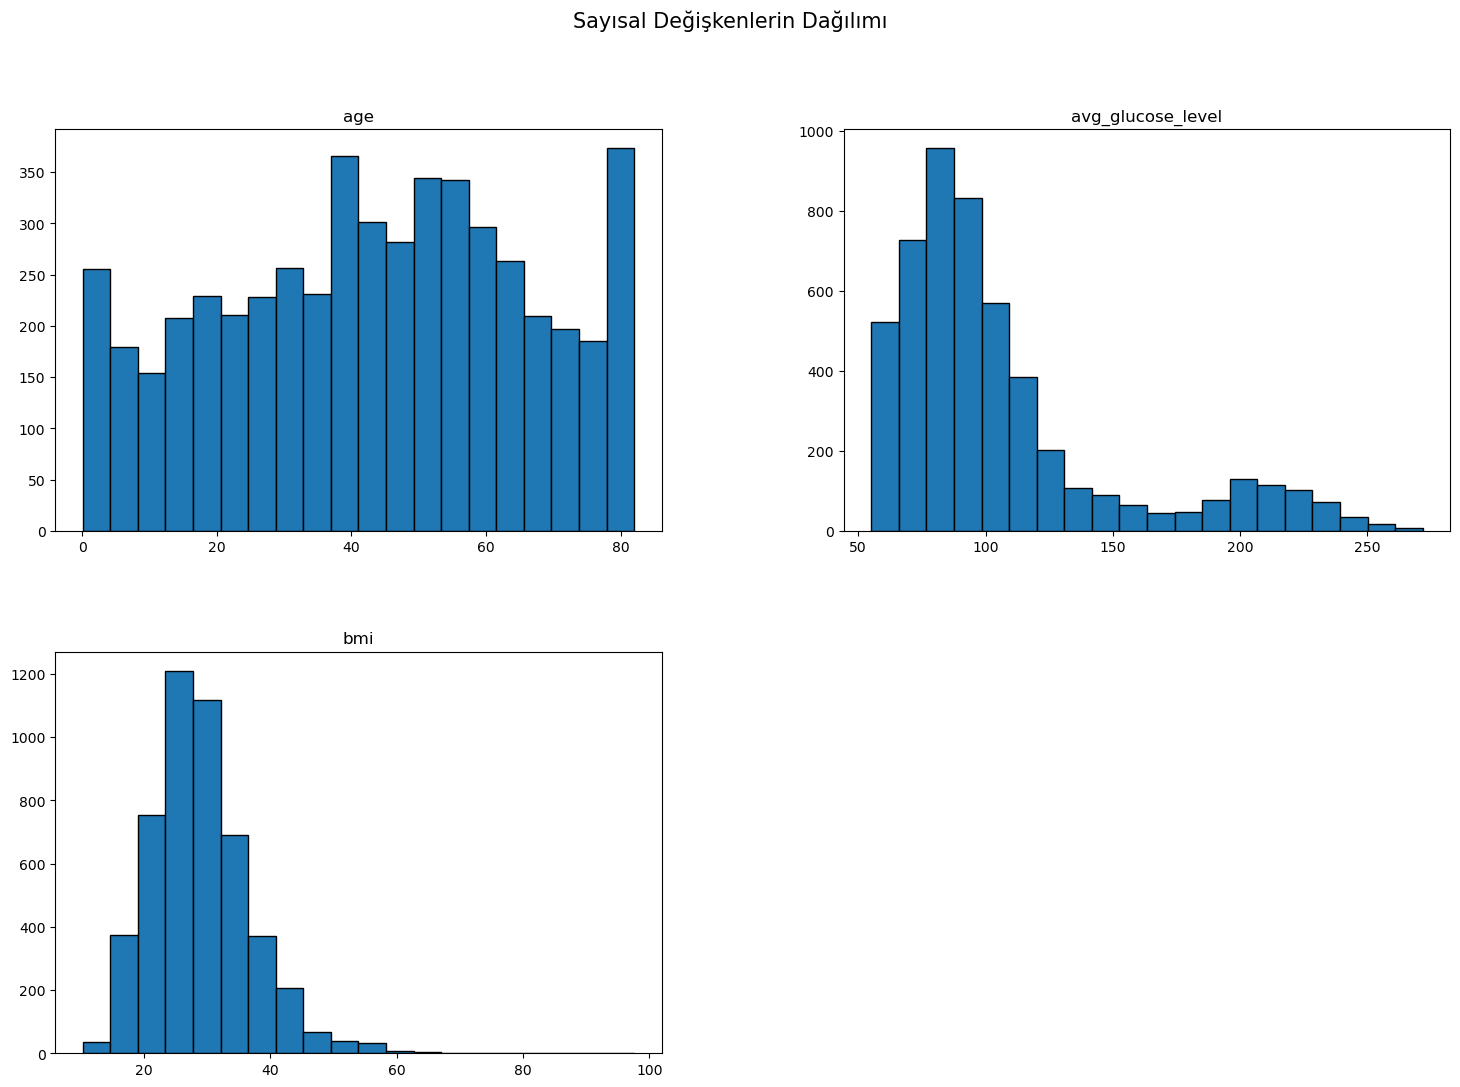

In [9]:
numeric_cols = ["age", "avg_glucose_level", "bmi"]

df[numeric_cols].hist(
    bins=20,
    figsize=(18, 12),
    grid=False,
    edgecolor="black"
)

plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=15)
plt.show()


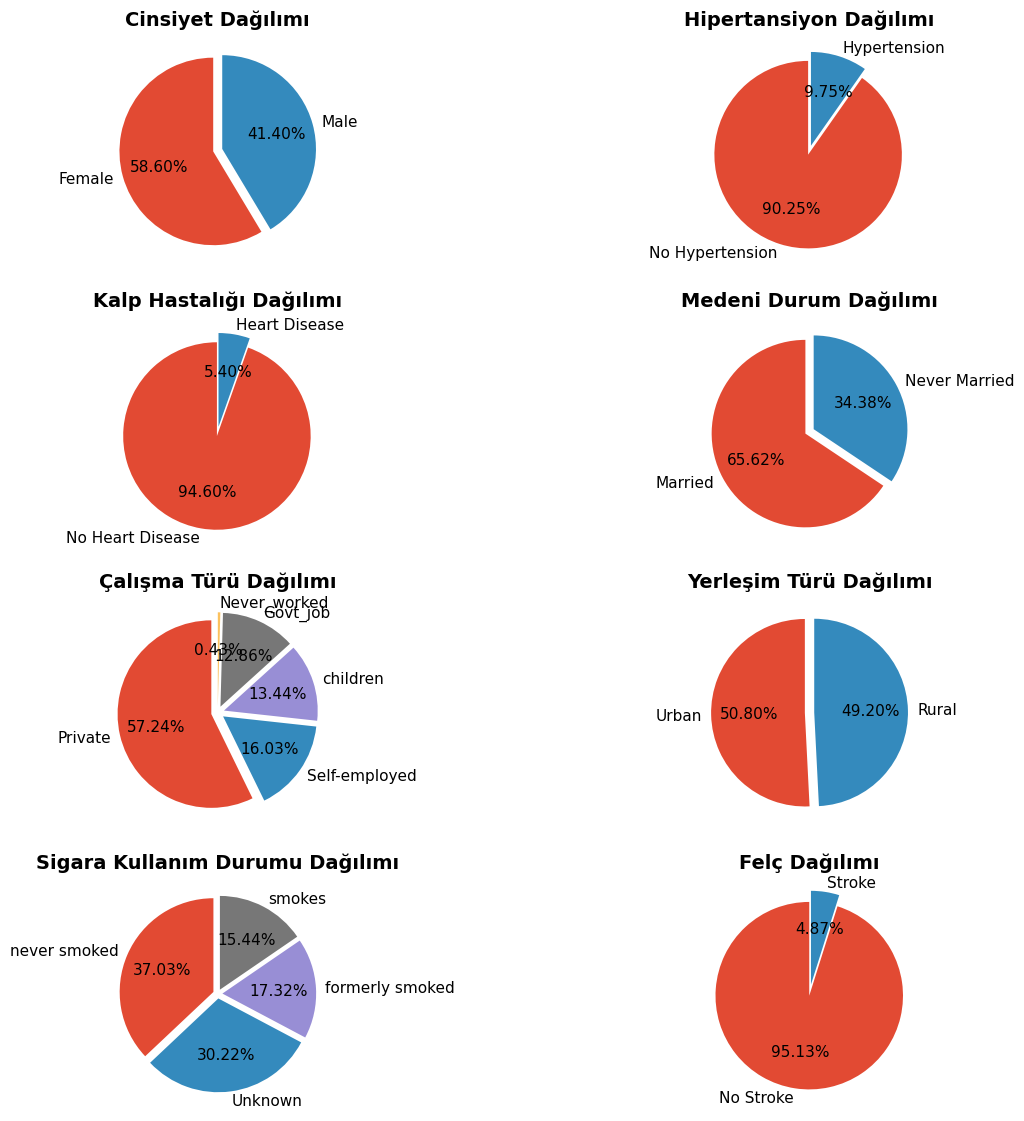

In [10]:
plt.style.use("ggplot")

fig, ax = plt.subplots(4, 2, figsize=(14, 14))
ax = ax.flatten()

def plot_pie(ax, data, labels, title, explode=None):
    if explode is None:
        explode = [0.05] * len(labels)

    ax.pie(
        data,
        labels=labels,
        autopct="%1.2f%%",
        shadow=False,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 11}
    )
    ax.set_title(title, fontsize=14, fontweight="bold")


# 1 — Gender
labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
plot_pie(ax[0], values, labels, "Cinsiyet Dağılımı")

# 2 — Hypertension
labels = ["No Hypertension", "Hypertension"]
values = df['hypertension'].value_counts().tolist()
plot_pie(ax[1], values, labels, "Hipertansiyon Dağılımı")

# 3 — Heart Disease
labels = ["No Heart Disease", "Heart Disease"]
values = df['heart_disease'].value_counts().tolist()
plot_pie(ax[2], values, labels, "Kalp Hastalığı Dağılımı")

# 4 — Marriage
labels = ["Married", "Never Married"]
values = df['ever_married'].value_counts().tolist()
plot_pie(ax[3], values, labels, "Medeni Durum Dağılımı")

# 5 — Work Type
labels = df['work_type'].value_counts().index.tolist()
values = df['work_type'].value_counts().tolist()
plot_pie(ax[4], values, labels, "Çalışma Türü Dağılımı", explode=[0.07]*len(labels))

# 6 — Residence Type
labels = ["Urban", "Rural"]
values = df['Residence_type'].value_counts().tolist()
plot_pie(ax[5], values, labels, "Yerleşim Türü Dağılımı")

# 7 — Smoking Status
labels = df['smoking_status'].value_counts().index.tolist()
values = df['smoking_status'].value_counts().tolist()
plot_pie(ax[6], values, labels, "Sigara Kullanım Durumu Dağılımı", explode=[0.05]*len(labels))

# 8 — Stroke
labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()
plot_pie(ax[7], values, labels, "Felç Dağılımı", explode=[0.02, 0.1])
plt.show()


In [11]:
bmi_mean = df["bmi"].mean()
df["bmi"] = df["bmi"].fillna(bmi_mean)
# BMI sütunundaki eksik (NaN) değerler, hesaplanan ortalama BMI değeri ile doldurulur
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
def iqr_outlier_limits(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

for col in ["bmi", "age", "avg_glucose_level"]:
    low, up = iqr_outlier_limits(df, col)
    print(f"{col} -> Alt sınır: {low:.2f}, Üst sınır: {up:.2f}")

bmi -> Alt sınır: 10.30, Üst sınır: 46.30
age -> Alt sınır: -29.00, Üst sınır: 115.00
avg_glucose_level -> Alt sınır: 21.98, Üst sınır: 169.36


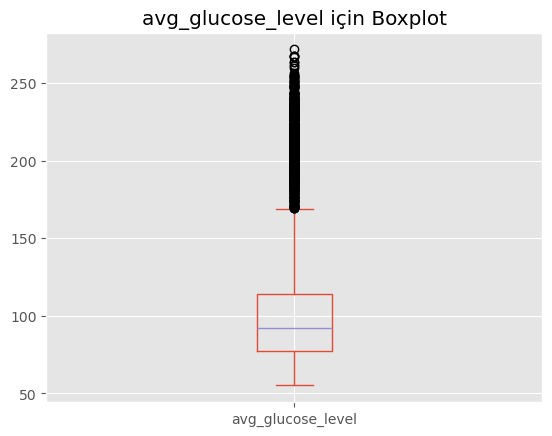

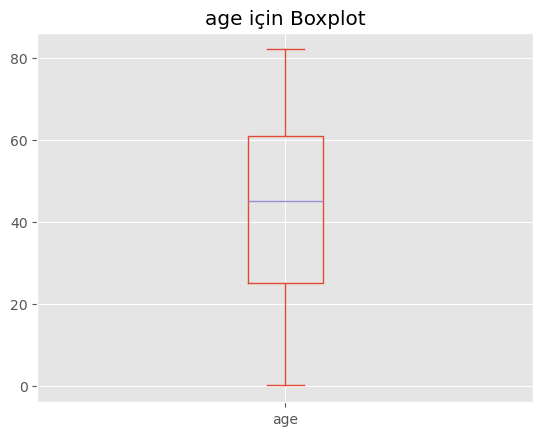

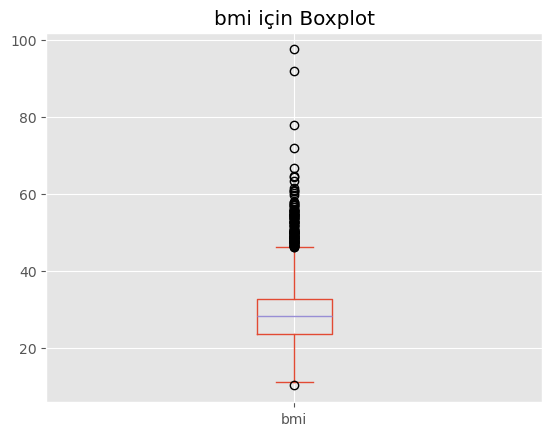

In [13]:
import matplotlib.pyplot as plt

for col in ["avg_glucose_level", "age", "bmi"]:
    plt.figure()
    df[col].plot(kind="box")
    plt.title(f"{col} için Boxplot")
    plt.show()

- “avg_glucose_level değişkeni sağa çarpık bir dağılım göstermektedir. Özellikle yüksek glikoz seviyelerinde belirgin sayıda aykırı değer bulunmaktadır.”
- “Age değişkeni geniş bir aralıkta dağılmakta olup, ortanca değer yaklaşık 45’tir. Veri setinin %50’si 25–60 yaş aralığında yer almakta ve belirgin aykırı değer gözlenmemektedir.”
- “BMI değişkeni sağa çarpık bir dağılım sergilemekte ve özellikle yüksek BMI değerlerinde belirgin aykırı gözlemler içermektedir. Veri setindeki bireylerin büyük bir kısmı fazla kilolu aralığında yer almaktadır.”
- Veri kısıtlılığından dolayı aykırı değerleri tamamen silmek büyük oranda bilgi kaybına neden olabilir. Bu yüzden onlar da makine öğrenmesi sürecine dahil edilecektir.

In [14]:
print(df['gender'].value_counts())
df = df[df['gender'] != "Other"] #1 adet other değerini dağılımı bozmaması için kaldırdık.

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [15]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [16]:
df_copy = df.copy()

df_result = pd.get_dummies(
    df_copy,
    columns=[
        'hypertension', 'heart_disease', 'gender',
        'ever_married', 'work_type', 'Residence_type',
        'smoking_status'
    ],
    prefix=[
        'hypertension', 'heart_disease', 'gender',
        'ever_married', 'work_type', 'Residence_type',
        'smoking_status'
    ]
)
# Kategorik değişkenler One-Hot Encoding yöntemiyle sayısal hale getirilir

df_result.rename(
    columns={
        "hypertension_0": "no_hypertension",
        "hypertension_1": "yes_hypertension",
        "heart_disease_0": "no_heart_disease",
        "heart_disease_1": "yes_heart_disease"
    },
    inplace=True
)

df_result = df_result.astype(float, errors='ignore')
# Sayısal olan sütunlar float veri tipine dönüştürülür

print(df_result.columns.tolist())
df_result

['id', 'age', 'avg_glucose_level', 'bmi', 'stroke', 'no_hypertension', 'yes_hypertension', 'no_heart_disease', 'yes_heart_disease', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,228.69,36.600000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676.0,61.0,202.21,28.893237,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,105.92,32.500000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,171.23,34.400000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665.0,79.0,174.12,24.000000,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,83.75,28.893237,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873.0,81.0,125.20,40.000000,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723.0,35.0,82.99,30.600000,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544.0,51.0,166.29,25.600000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df_result.corr()

,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003677,0.000943,0.003153,0.006430,-0.003610,0.003610,0.001253,-0.001253,-0.001929,...,0.005471,0.023545,-0.019879,-0.013869,0.001219,-0.001219,-0.019126,0.007419,0.011567,0.001081
age,0.003677,1.000000,0.238323,0.325858,0.245239,-0.276367,0.276367,-0.263777,0.263777,0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
avg_glucose_level,0.000943,0.238323,1.000000,0.168910,0.131991,-0.174540,0.174540,-0.161907,0.161907,-0.054722,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.003153,0.325858,0.168910,1.000000,0.038912,-0.160147,0.160147,-0.038862,0.038862,0.025606,...,-0.028612,0.204055,0.070756,-0.442945,0.000288,-0.000288,-0.265094,0.104674,0.106107,0.085516
stroke,0.006430,0.245239,0.131991,0.038912,1.000000,-0.127891,0.127891,-0.134905,0.134905,-0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
no_hypertension,-0.003610,-0.276367,-0.174540,-0.160147,-0.127891,1.000000,-1.000000,0.108292,-0.108292,0.021223,...,0.021612,0.005358,-0.115417,0.129535,-0.007980,0.007980,0.141551,-0.059022,-0.065018,-0.031213
yes_hypertension,0.003610,0.276367,0.174540,0.160147,0.127891,-1.000000,1.000000,-0.108292,0.108292,-0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
no_heart_disease,0.001253,-0.263777,-0.161907,-0.038862,-0.134905,0.108292,-0.108292,1.000000,-1.000000,0.085685,...,0.015715,-0.000068,-0.086742,0.091654,0.003045,-0.003045,0.066765,-0.066938,0.021893,-0.044030
yes_heart_disease,-0.001253,0.263777,0.161907,0.038862,0.134905,-0.108292,0.108292,-1.000000,1.000000,-0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
gender_Female,-0.001929,0.027752,-0.054722,0.025606,-0.009081,0.021223,-0.021223,0.085685,-0.085685,1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408


In [18]:
corr_matrix = df_result.corr()
corr_matrix["stroke"].sort_values(ascending = False) #ihtiyacımız olan sutünü aldık.

stroke                            1.000000
age                               0.245239
yes_heart_disease                 0.134905
avg_glucose_level                 0.131991
yes_hypertension                  0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.038912
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
id                                0.006430
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
gender_Female                    -0.009081
work_type_Never_worked           -0.014885
Residence_type_Rural             -0.015415
smoking_status_Unknown           -0.055924
work_type_children               -0.083888
ever_married_No                  -0.108299
no_hypertension                  -0.127891
no_heart_di

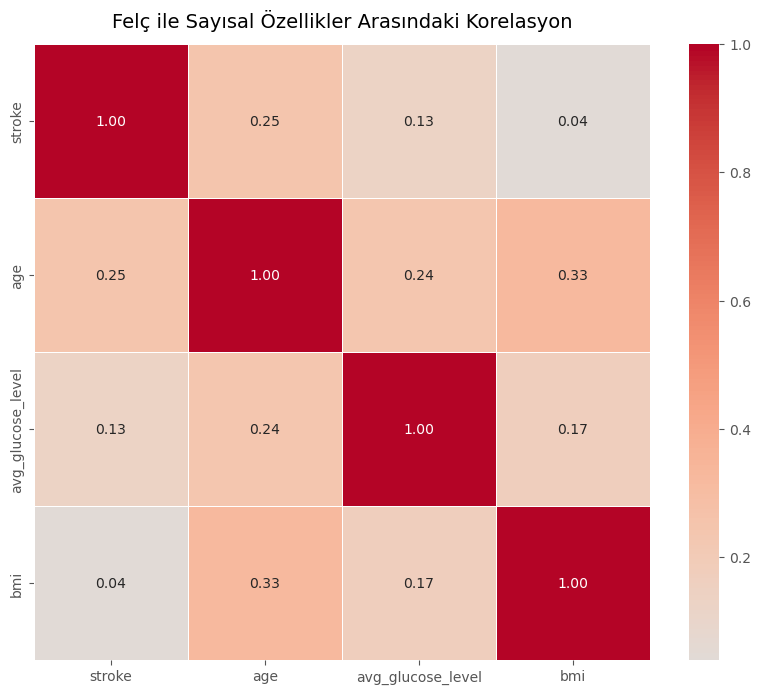

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    df_result[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    ax=ax
)

ax.set_title(
    'Felç ile Sayısal Özellikler Arasındaki Korelasyon',
    fontsize=14,
    pad=12
)

plt.show()


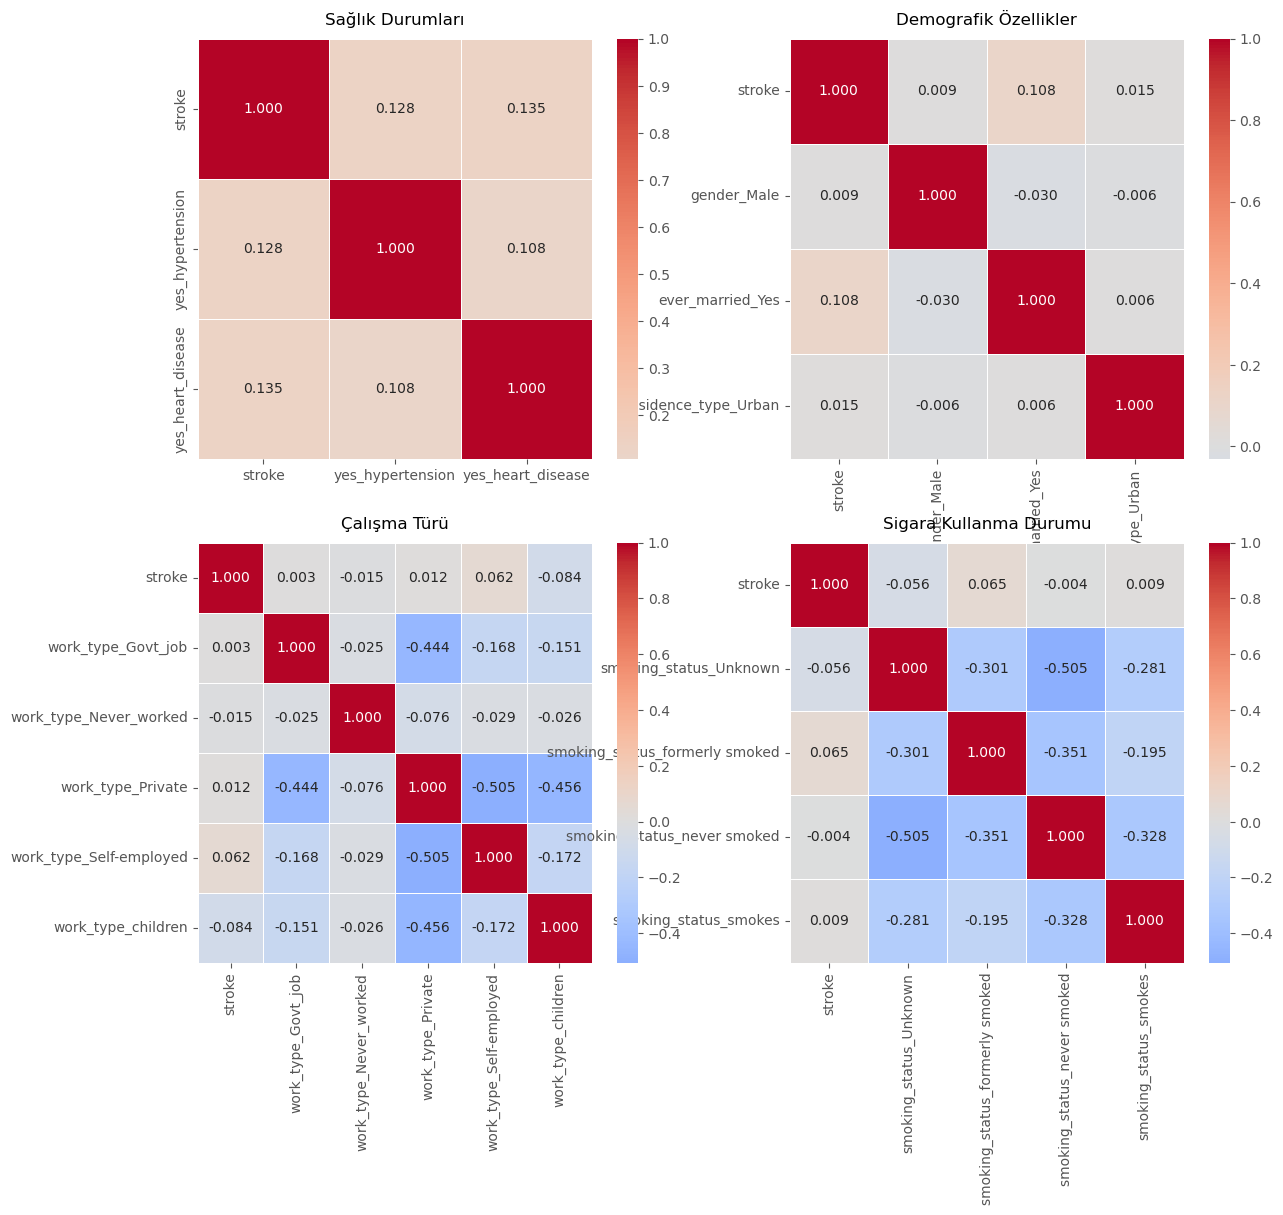

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

heatmap_groups = [
    (['stroke', 'yes_hypertension', 'yes_heart_disease'],
     'Sağlık Durumları'),

    (['stroke', 'gender_Male', 'ever_married_Yes', 'Residence_type_Urban'],
     'Demografik Özellikler'),

    (['stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
     'Çalışma Türü'),

    (['stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
     'Sigara Kullanma Durumu')
]

for ax, (cols, title) in zip(axes, heatmap_groups):
    sns.heatmap(
        df_result[cols].corr(),
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        linewidths=0.5,
        ax=ax
    )
    ax.set_title(title, fontsize=12, pad=10)

plt.show()


#### **Felç (Stroke) ile anlamlı düzeyde korelasyona sahip değişkenler (> 0.10):**

* **Yaş**
* **Ortalama glikoz seviyesi**
* **Hipertansiyon**
* **Kalp hastalığı öyküsü**
* **Medeni durum (evli olma durumu)**


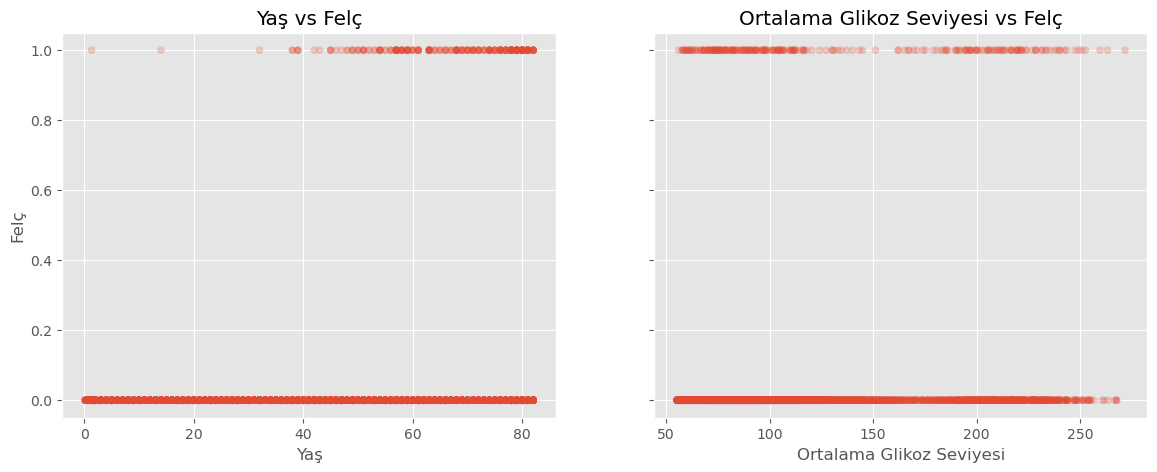

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

scatter_settings = dict(
    alpha=0.25,
    s=30,
    edgecolor="none"
)

axes[0].scatter(df_result['age'], df_result['stroke'], **scatter_settings)
axes[0].set_title('Yaş vs Felç')
axes[0].set_xlabel('Yaş')
axes[0].set_ylabel('Felç')

axes[1].scatter(df_result['avg_glucose_level'], df_result['stroke'], **scatter_settings)
axes[1].set_title('Ortalama Glikoz Seviyesi vs Felç')
axes[1].set_xlabel('Ortalama Glikoz Seviyesi')

plt.show()


* **Bir kişi yaşlandıkça felç (stroke) geçirme olasılığı artmaktadır.**
* **Kan glikoz seviyesi her iki uçta da risklidir; yaklaşık olarak 120–180 aralığı daha güvenli bir bölge olarak değerlendirilebilir.**


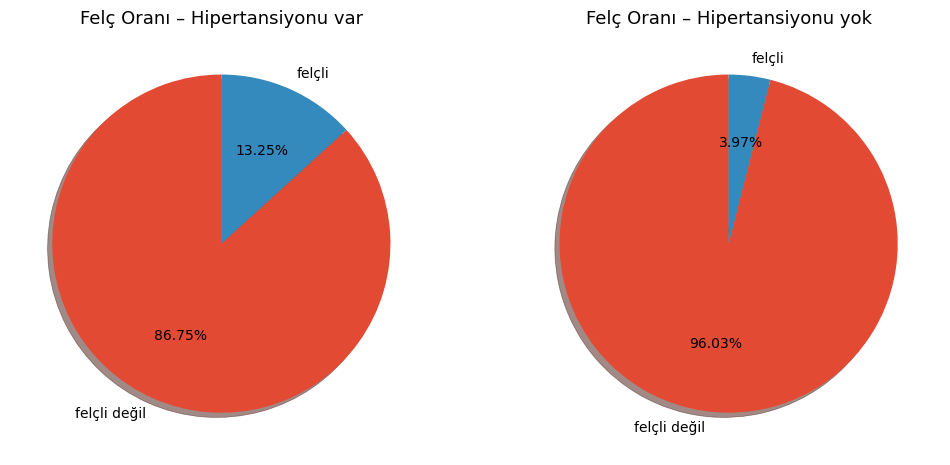

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

stroke_labels = ["felçli değil", "felçli"]
hypertension_cases = {
    "Hipertansiyonu var": "yes_hypertension",
    "Hipertansiyonu yok": "no_hypertension"
}

for ax, (title, col) in zip(axes, hypertension_cases.items()):
    values = (
        df_result[df_result[col] == 1]['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0)
        .values
    )
    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.2f%%",
        shadow=True,
        startangle=90
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=13)

plt.show()


- Hipertansiyon sahip olan bireylerde, felç olma riski yaklaşık %10 daha yüksektir.

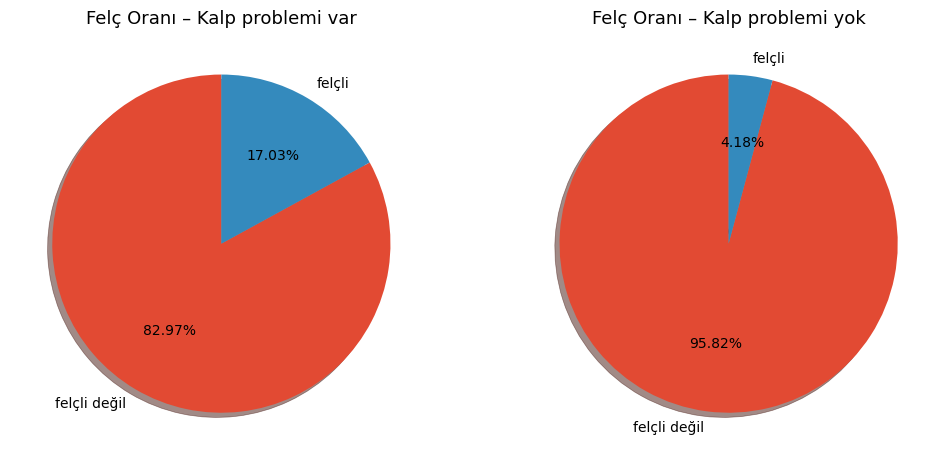

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

stroke_labels = ["felçli değil", "felçli"]
heart_disease_cases = {
    "Kalp problemi var": "yes_heart_disease",
    "Kalp problemi yok": "no_heart_disease"
}

for ax, (title, col) in zip(axes, heart_disease_cases.items()):
    values = (
        df_result[df_result[col] == 1]['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0)
        .values
    )

    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.2f%%",
        shadow=True,
        startangle=90
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=13)
plt.show()


- Kalp hastalığına sahip olan bireylerde, felç olma riski yaklaşık %13 daha yüksektir.

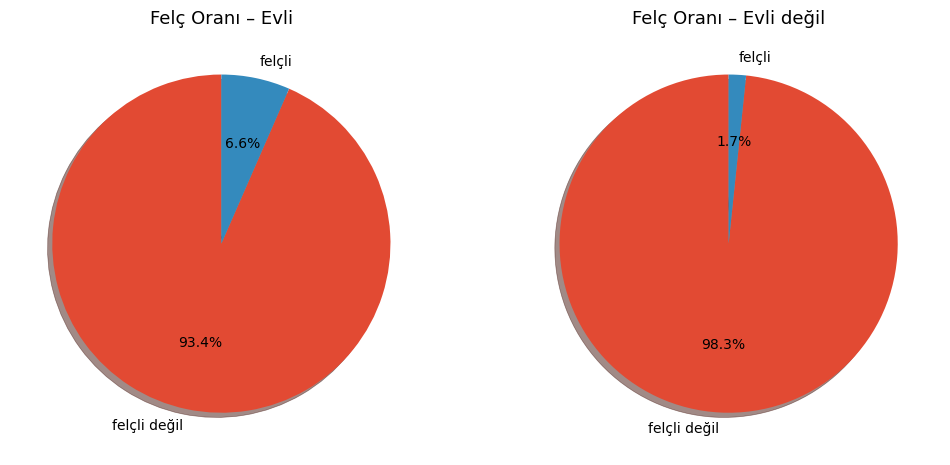

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

stroke_labels = ["felçli değil", "felçli"]
marital_status = {
    "Evli": "ever_married_Yes",
    "Evli değil": "ever_married_No"
}

for ax, (title, col) in zip(axes, marital_status.items()):
    values = (
        df_result[df_result[col] == 1]['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0)
        .values
    )

    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.1f%%",
        shadow=True,
        startangle=90
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=13)

plt.show()


- Evli bireylerde felç görülme oranı, evli olmayan bireylere kıyasla yaklaşık %5 daha yüksektir.

#### **BMI – Burada bazı örüntüler yakalayabilir miyiz?**

- Bu sonuçlar biraz garip görünüyor. Literatürdeki birçok çalışma, yüksek BMI’nin inme (stroke) için önemli bir risk faktörü olduğunu göstermektedir. Ancak bu veri setinde bunun birkaç olası açıklaması olabilir. Veri seti yeterince temsili olmayabilir ya da gerçekten yüksek BMI ile inme arasında istatistiksel olarak anlamlı bir ilişki bulunmuyor olabilir. Ayrıca, yüksek BMI değerlerine sahip gözlemler aykırı değer (outlier) niteliğinde olabilir ve bu nedenle göz ardı edilmeleri düşünülebilir. Bununla birlikte, veri setimizin yeterince büyük olmaması nedeniyle bu gözlemleri dışlamayacak ve bu bilgiyi temsili kabul ederek analizimize dahil edeceğiz.

- Her ne kadar BMI’nin inme ile olan doğrudan korelasyonu düşük görünse de, inme ile yüksek korelasyona sahip olan diğer değişkenler üzerinde önemli etkileri bulunmaktadır. Bu nedenle BMI’yi tamamen göz ardı etmek yerine, bu değişken üzerinden bazı örüntüleri ortaya çıkarmayı denemek anlamlıdır. Özellikle belirli BMI aralıklarının başka bir değişkenle (örneğin hipertansiyon, kalp hastalığı veya yaş) birlikte ele alındığında, inme açısından önemli bir risk faktörü oluşturup oluşturmadığı incelenmeye değerdir.


In [25]:
corr_matrix = df_result.corr()
bmi_corr = corr_matrix["bmi"].sort_values(ascending = False).drop('bmi')
print(bmi_corr[bmi_corr>0.15])
print(bmi_corr[bmi_corr<-0.15])

ever_married_Yes     0.335563
age                  0.325858
work_type_Private    0.204055
avg_glucose_level    0.168910
yes_hypertension     0.160147
Name: bmi, dtype: float64
no_hypertension          -0.160147
smoking_status_Unknown   -0.265094
ever_married_No          -0.335563
work_type_children       -0.442945
Name: bmi, dtype: float64


- Bu korelasyonlar, BMI’nin inme (stroke) üzerindeki rolünü **dolaylı bir faktör** olarak daha iyi anlamamıza yardımcı olabilir. Bu nedenle, inme ile ilişkili olan bu korelasyonları da ayrıca incelemek faydalı olacaktır.

#### İlk olarak, yaklaşık **30 civarındaki BMI değerlerinin** en fazla inme vakasına sahip olduğunu görebiliriz.


<Axes: title={'center': 'Felç ve bmi grafiği'}, xlabel='bmi', ylabel='stroke'>

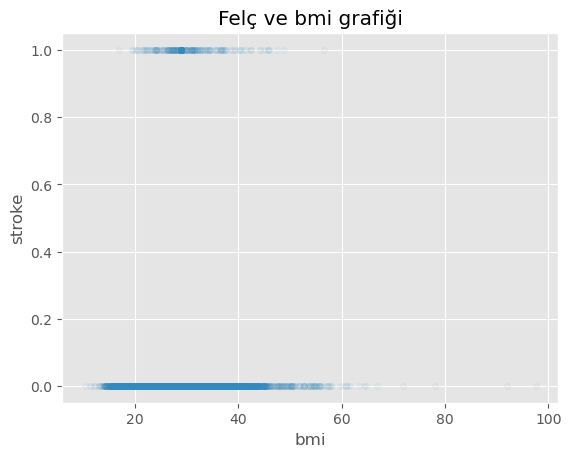

In [26]:
df.plot.scatter( x='bmi', y='stroke', alpha = 0.05, title="Felç ve bmi grafiği")

In [27]:
# BMI 30 civarında (+-3) maskeleme
bmi_around_30 = df[(df['bmi'] > 27) & (df['bmi'] < 33)]

stroke_total = (
    df['stroke']
    .value_counts()
    .reindex([0, 1], fill_value=0)
)

stroke_bmi30 = (
    bmi_around_30['stroke']
    .value_counts()
    .reindex([0, 1], fill_value=0)
)

ratio_no_stroke = stroke_bmi30[0] / stroke_total[0]
ratio_all = stroke_bmi30.sum() / stroke_total.sum()
ratio_stroke = stroke_bmi30[1] / stroke_total[1]

print(f"BMI ≈ 30 | Felç Olmayan Vaka Oranı  : {ratio_no_stroke:.3f}")
print(f"BMI ≈ 30 | Tüm Gözlem Oranı         : {ratio_all:.3f}")
print(f"BMI ≈ 30 | Felç Vaka Oranı          : {ratio_stroke:.3f}")

print(
    "\nGörüldüğü üzere, felç (stroke) vakalarının neredeyse yarısında BMI değeri 30 civarındadır. "
    "Buna karşılık, inme olmayan vakalarda bu oran belirgin şekilde daha düşüktür "
    "(yaklaşık üçte bir)."
)


BMI ≈ 30 | Felç Olmayan Vaka Oranı  : 0.323
BMI ≈ 30 | Tüm Gözlem Oranı         : 0.332
BMI ≈ 30 | Felç Vaka Oranı          : 0.518

Görüldüğü üzere, felç (stroke) vakalarının neredeyse yarısında BMI değeri 30 civarındadır. Buna karşılık, inme olmayan vakalarda bu oran belirgin şekilde daha düşüktür (yaklaşık üçte bir).


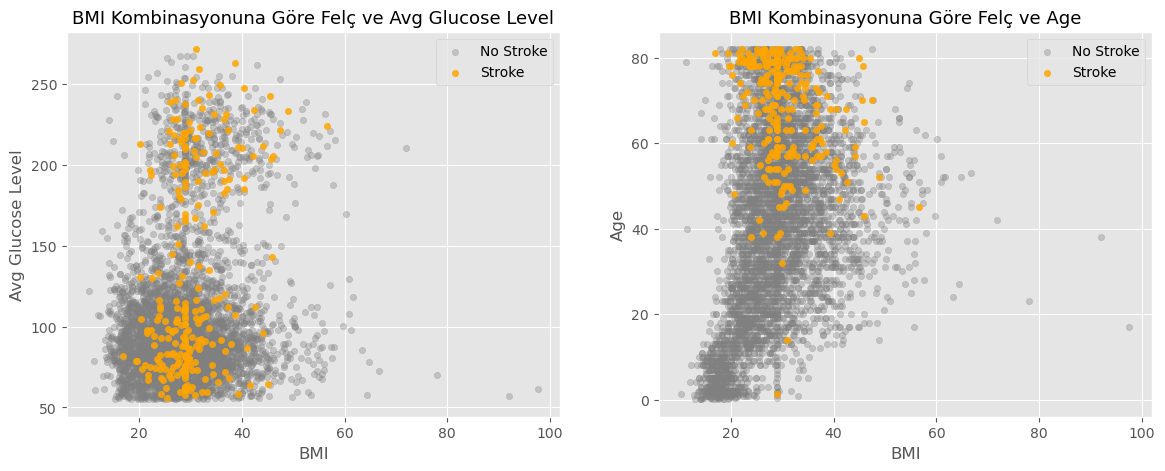

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plots = [
    ("avg_glucose_level", "Avg Glucose Level"),
    ("age", "Age")
]

for ax, (y_col, y_label) in zip(axes, plots):
    df[df['stroke'] == 0].plot.scatter(
        ax=ax,
        x='bmi',
        y=y_col,
        alpha=0.35,
        c='gray',
        label='No Stroke'
    )

    df[df['stroke'] == 1].plot.scatter(
        ax=ax,
        x='bmi',
        y=y_col,
        alpha=0.85,
        c='orange',
        label='Stroke'
    )

    ax.set_title(f"BMI Kombinasyonuna Göre Felç ve {y_label}", fontsize=13)
    ax.set_xlabel("BMI")
    ax.set_ylabel(y_label)
    ax.legend()

plt.show()


- Sağdaki grafikte (yukarıda), **BMI ve yaş (AGE)** kombinasyonunun inme (stroke) tahmininde oldukça güçlü bir faktör olduğu görülmektedir. Soldaki grafikte (yukarıda) ise her ne kadar bir örüntü gözlemlense de, bu ilişki o kadar basit değildir. Daha önce de gördüğümüz üzere, **çok yüksek ve çok düşük glikoz seviyeleri** inme açısından önemli bir faktördür. Bu grafik ise BMI’nin yardımıyla inme vakalarının daha çok merkezde toplandığını göstermektedir.

- Bir sonraki grafiklerde; **BMI ve evlilik durumu (yüksek korelasyon)**, **BMI ve hipertansiyon (yüksek korelasyon)** ve **BMI ile kalp hastalığı öyküsü (düşük korelasyon)** birlikte incelenmiştir. Aşağıda görüldüğü gibi, **BMI değeri yaklaşık 30 civarında olan bireylerde**, evli olan ya da hipertansiyonu bulunan kişiler için inme görülme olasılığı artmaktadır. Ancak bu artış **anlamlı veya benzersiz bir örüntü** ortaya koymamaktadır; çünkü evli/hipertansiyonu olanlar ile olmayanlar arasındaki inme yüzdesi farkı **görece benzer seviyelerde kalmaktadır**. Buna ek olarak, benzer bir artışın **kalp hastalığı** değişkeninde de ortaya çıktığı görülmektedir.


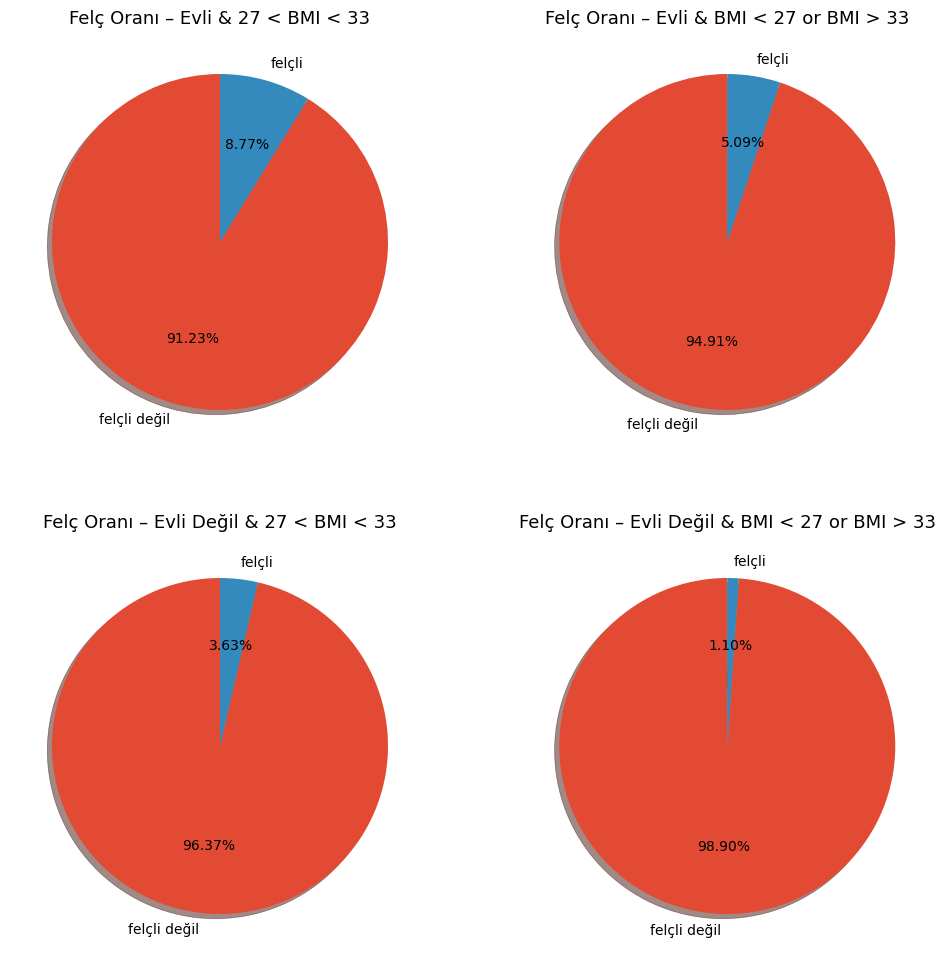

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

stroke_labels = ["felçli değil", "felçli"]

configs = [
    (0, 0, "ever_married_Yes",  True,  "Evli & 27 < BMI < 33"),
    (0, 1, "ever_married_Yes",  False, "Evli & BMI < 27 or BMI > 33"),
    (1, 0, "ever_married_No",   True,  "Evli Değil & 27 < BMI < 33"),
    (1, 1, "ever_married_No",   False, "Evli Değil & BMI < 27 or BMI > 33"),
]

for r, c, married_col, bmi_mid, title in configs:
    ax = axes[r, c]

    if bmi_mid:
        subset = df_result[
            (df_result[married_col] == 1) &
            (df_result['bmi'] > 27) &
            (df_result['bmi'] < 33)
        ]
    else:
        subset = df_result[
            (df_result[married_col] == 1) &
            ((df_result['bmi'] < 27) | (df_result['bmi'] > 33))
        ]

    values = (
        subset['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0) 
        .values
    )

    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.2f%%",
        startangle=90,
        shadow=True
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=13)

plt.show()


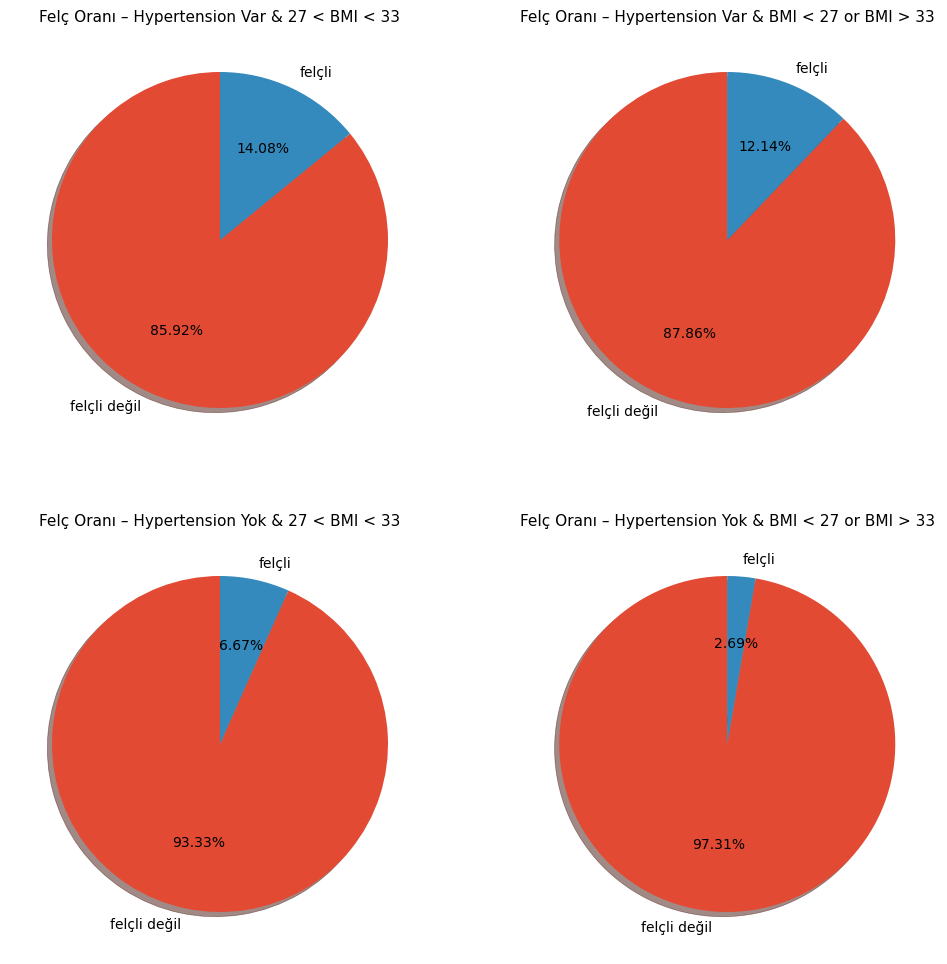

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stroke_labels = ["felçli değil", "felçli"]

configs = [
    (0, 0, "yes_hypertension", True,  "Hypertension Var & 27 < BMI < 33"),
    (0, 1, "yes_hypertension", False, "Hypertension Var & BMI < 27 or BMI > 33"),
    (1, 0, "no_hypertension",  True,  "Hypertension Yok & 27 < BMI < 33"),
    (1, 1, "no_hypertension",  False, "Hypertension Yok & BMI < 27 or BMI > 33"),
]

for r, c, hyper_col, bmi_mid, title in configs:
    ax = axes[r, c]

    if bmi_mid:
        subset = df_result[
            (df_result[hyper_col] == 1) &
            (df_result['bmi'] > 27) &
            (df_result['bmi'] < 33)
        ]
    else:
        subset = df_result[
            (df_result[hyper_col] == 1) &
            ((df_result['bmi'] < 27) | (df_result['bmi'] > 33))
        ]

    values = (
        subset['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0)
        .values
    )

    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.2f%%",
        startangle=90,
        shadow=True
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=11)

plt.show()


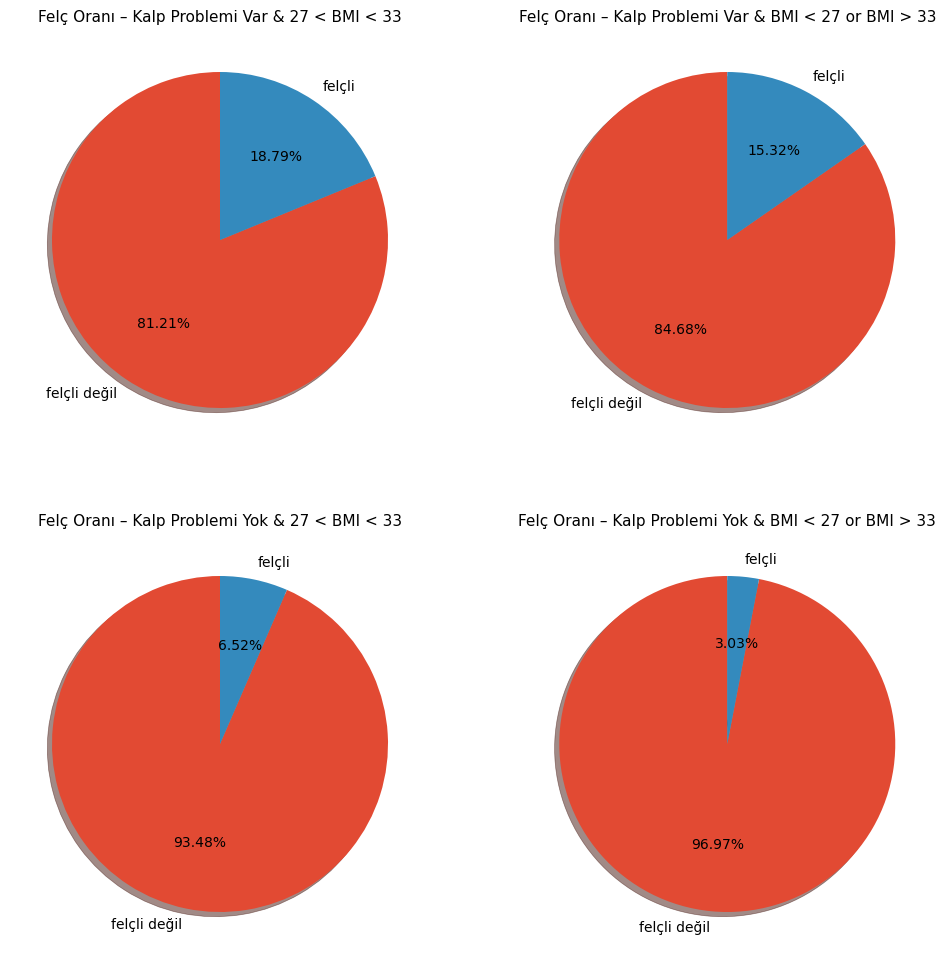

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stroke_labels = ["felçli değil", "felçli"]

configs = [
    (0, 0, "yes_heart_disease", True,  "Kalp Problemi Var & 27 < BMI < 33"),
    (0, 1, "yes_heart_disease", False, "Kalp Problemi Var & BMI < 27 or BMI > 33"),
    (1, 0, "no_heart_disease",  True,  "Kalp Problemi Yok & 27 < BMI < 33"),
    (1, 1, "no_heart_disease",  False, "Kalp Problemi Yok & BMI < 27 or BMI > 33"),
]

for r, c, heart_col, bmi_mid, title in configs:
    ax = axes[r, c]

    if bmi_mid:
        subset = df_result[
            (df_result[heart_col] == 1) &
            (df_result['bmi'] > 27) &
            (df_result['bmi'] < 33)
        ]
    else:
        subset = df_result[
            (df_result[heart_col] == 1) &
            ((df_result['bmi'] < 27) | (df_result['bmi'] > 33))
        ]

    values = (
        subset['stroke']
        .value_counts()
        .reindex([0, 1], fill_value=0) 
        .values
    )

    ax.pie(
        values,
        labels=stroke_labels,
        autopct="%1.2f%%",
        startangle=90,
        shadow=True
    )
    ax.set_title(f"Felç Oranı – {title}", fontsize=11)

plt.show()

In [32]:
df = df_result.copy()

### **Örüntüler ve Korelasyon Sonuçları**

#### **Felç (Stroke) ile ana korelasyona sahip değişkenler (> 0.10):**

* Yaş (age)
* Ortalama kan glikoz seviyesi (avg glucose level)
* Hipertansiyon
* Kalp hastalığı öyküsü
* Medeni durum (evli olma)

#### **Felç ile ilgili gözlemlenen örüntüler:**

* Bir kişinin yaşı arttıkça, inme geçirme olasılığı da artmaktadır.
* Kan glikoz seviyesi her iki uçta da (çok düşük ve çok yüksek) tehlikelidir; yaklaşık **120–180** aralığı görece daha güvenli bir bölge olarak görülmektedir.
* Kalp hastalığı öyküsüne sahip olmak, inme riskini yaklaşık **%13** oranında artırmaktadır.
* Hipertansiyon, inme riskini yaklaşık **%10** oranında artırmaktadır.
* İnme vakalarının yaklaşık **yarısında BMI değeri 30 civarındadır**.
* **BMI ve yaşın birlikte ele alınması**, inme tahmini açısından oldukça güçlü bir faktördür; özellikle **ileri yaş + BMI ≈ 30** kombinasyonu inme riskini belirgin şekilde artırmaktadır.


### **İkili sınıflandırma için karışıklık matrisi (Confusion Matrix)**

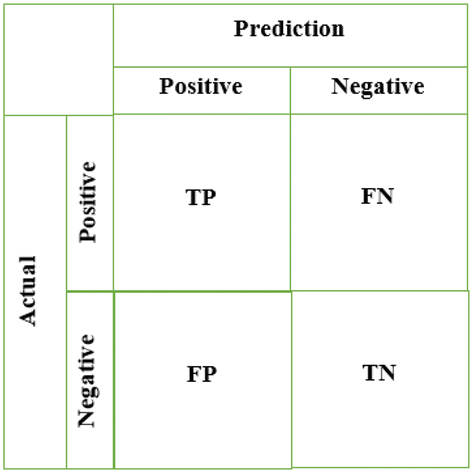

In [33]:
from IPython.display import Image, display
display(Image(filename="A-confusion-matrix.png"))

**1. True Positive (TP)**
True Positive (TP), veri nesnesinin gerçek sınıfı **True (pozitif)** olduğu ve modelin tahmininin de **True** olduğu durumlarda elde edilen **doğru tahminlerin toplam sayısı** olarak tanımlanır.

**2. True Negative (TN)**
True Negative (TN), veri nesnesinin gerçek sınıfı **False (negatif)** olduğu ve modelin tahmininin de **False** olduğu durumlarda elde edilen **doğru tahminlerin toplam sayısı**dır.

**3. False Positive (FP)**
False Positive (FP), veri nesnesinin gerçek sınıfı **False (negatif)** olduğu hâlde modelin tahmininin **True (pozitif)** olduğu durumlardır. Bu durum **yanlış pozitif** olarak adlandırılır.

**4. False Negative (FN)**
False Negative (FN), veri nesnesinin gerçek sınıfı **True (pozitif)** olduğu hâlde modelin tahmininin **False (negatif)** olduğu durumlardır. Bu durum **yanlış negatif** olarak adlandırılır.

---

### **Karışıklık Matrisinden (Confusion Matrix) Hesaplanan Metrikler**

Bir karışıklık matrisi, modelin ne kadar iyi performans gösterdiğine dair faydalı bilgiler sunar. Bununla birlikte, matrisin elemanları kullanılarak model performansını daha ayrıntılı değerlendirmek için çeşitli metrikler hesaplanabilir. En yaygın kullanılan metrikler şunlardır:

**1. Accuracy (Doğruluk)**
Accuracy, en sezgisel performans ölçütüdür ve **doğru sınıflandırılan örneklerin sayısının**, değerlendirilen **toplam örnek sayısına oranı** olarak tanımlanır.

**2. Precision (Kesinlik)**
Precision, **doğru tahmin edilen pozitif örneklerin sayısının**, **toplam pozitif tahmin edilen örnek sayısına oranı**dır.

**3. Recall (Duyarlılık / Geri Çağırım)**
Recall, **doğru pozitif sonuçların sayısının**, gerçekte pozitif olan **tüm örneklerin sayısına oranı** olarak tanımlanır.

**4. F-score (F-ölçütü)**
F-score, **precision ve recall değerlerinin ağırlıklı ortalaması**dır. F-score değeri **1’e ulaştığında mükemmel performansı**, **0 olduğunda ise modelin tamamen başarısız olduğunu** ifade eder.

**5. F-beta-score (F-β ölçütü)**
F-beta-score, F-score’un genelleştirilmiş hâlidir ve **beta (β)** adı verilen bir yapılandırma parametresi içerir. Varsayılan beta değeri **1.0** olup bu durum klasik F-score ile aynıdır.

* **Daha küçük beta değerleri** (ör. **0.5**), precision’a daha fazla, recall’a daha az ağırlık verir.
* **Daha büyük beta değerleri** (ör. **2.0**), recall’a daha fazla, precision’a daha az ağırlık verir.

*(Kaynak: [https://link.springer.com/article/10.1007/s42452-019-1356-9](https://link.springer.com/article/10.1007/s42452-019-1356-9))*


Performans ölçümü için birkaç farklı seçenek bulunmaktadır. Bu çalışmada, **iki metriğin (recall ve precision)** birlikte kullanıldığı **F-beta skoru** tercih edilmiştir:

$$ re-call = \frac{TP}{TP+FN}$$<br>
$$ precision = \frac{TP}{TP+FP} $$

Recall değerinin **olabildiğince yüksek olması** gerekmektedir; çünkü mümkün olduğunca fazla **inme (stroke) vakasını tespit etmek** istiyoruz. FN maliyeti, FP maliyetine kıyasla çok daha yüksektir ve bu nedenle FN’yi minimize etmek önceliklidir.

Bu problemde **recall, precision’dan çok daha önemlidir**. Öncelikli amacımız, inme vakalarını olabildiğince erken ve eksiksiz bir şekilde belirleyebilmektir. Bu yüzden **beta = 4** olacak şekilde **F-beta skoru** kullanılacaktır. Bu, recall’un precision’a kıyasla **4 kat daha önemli** olduğu varsayımına dayanmaktadır.

$$ F_{\beta}(4) = \frac{(1+4^2) X precision X recall}{(4^2) X precision+recall} $$

**Accuracy (doğruluk)** metriği ise bu problem için uygun değildir. Bunun iki temel nedeni vardır:

**a.** Tüm inme vakalarını eksiksiz tahmin etmek pratikte mümkün değildir. 

**b.** Veri setinde inme vakaları çok azdır. Eğer model, her zaman “inme yok” (no stroke) şeklinde tahmin yaparsa bile, hedef değişkenin dağılımı nedeniyle yaklaşık **%95 doğruluk** elde edebilir. Bu durum, gerçekte modelin başarısını yansıtmayan **yanıltıcı (sahte) bir doğruluk** değeridir ve bu yanlılığı aşmak oldukça zordur.

Benzer şekilde, **F-score (F1)** metriği de bu görev için uygun değildir; çünkü F1 skorunda **recall ve precision eşit ağırlığa sahiptir**. Oysa bu çalışmada recall, precision’dan açıkça daha kritik bir öneme sahiptir.


#### Veri setimizi test ve train olmak üzere 2'ye ayırarak başlayalım.

In [34]:
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

sss = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [35]:
print(y_train.describe()[:3], y_test.describe()[:3])

count    4087.000000
mean        0.048691
std         0.215248
Name: stroke, dtype: float64 count    1022.000000
mean        0.048924
std         0.215814
Name: stroke, dtype: float64


- Özellik ölçeklemede (feature scaling) en yaygın kullanılan teknikler **Normalizasyon** ve **Standartlaştırma (Standardization)** yöntemleridir.

- **Normalizasyon**, değerleri belirli bir aralığa sıkıştırmak istediğimizde kullanılır; genellikle bu aralık **[0,1]** veya **[-1,1]**’dir.
- **Standartlaştırma** ise veriyi **ortalaması 0**, **varyansı 1** olacak şekilde dönüştürür. Bu işlem sonucunda veriler **birimsiz (unitless)** hale gelir.  (kaynak: [https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)).

Bu çalışmada **standartlaştırma** yöntemini kullanacağım. **Bunun nedeni**, aykırı değerlerin (outliers) etkisinin normalizasyona kıyasla **daha az belirgin** olmasıdır. Bu sayede model, uç değerlerden daha az etkilenerek daha dengeli ve güvenilir sonuçlar üretebilir.

#### Not:
Test setinin **eğitim (train) setine göre ölçeklendirilmesi** çok önemlidir.
Ölçekleme parametreleri (ortalama, standart sapma vb.) **yalnızca train seti üzerinden** öğrenilmeli, test seti bu parametreler kullanılarak dönüştürülmelidir. Aksi takdirde veri sızıntısı (data leakage) oluşur ve modelin performansı olduğundan daha iyi görünebilir.



In [36]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [37]:
scaler.fit(X_train[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])

X_train_scaled.describe()

,age,avg_glucose_level,bmi,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.087000e+03,4.087000e+03,4.087000e+03,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,...,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-1.373449e-16,2.642586e-16,-2.468732e-16,0.905310,0.094690,0.943235,0.056765,0.586494,0.413506,0.340103,...,0.003915,0.568632,0.162466,0.135796,0.497431,0.502569,0.302422,0.174945,0.371911,0.150722
std,1.000122e+00,1.000122e+00,1.000122e+00,0.292823,0.292823,0.231422,0.231422,0.492522,0.492522,0.473801,...,0.062454,0.495328,0.368923,0.342614,0.500055,0.500055,0.459363,0.379966,0.483374,0.357821
min,-1.907260e+00,-1.134397e+00,-2.402337e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.065280e-01,-6.366512e-01,-6.635186e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.688480e-02,-3.135136e-01,-6.236568e-02,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.836150e-01,1.822176e-01,5.064672e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.711198e+00,3.712554e+00,8.883825e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

- Artık eğitim (train) ve test setlerini ölçeklendirdiğimize göre, uygun ve iyi bir model bulma aşamasına geçebiliriz!


In [39]:
def cf_matrix_show(cm, beta=4, cmap="Blues"):
    """
    Confusion Matrix visualization with counts, percentages
    and classification metrics.

    Parameters
    ----------
    cm : array-like of shape (2, 2)
        Confusion matrix
    beta : float, default=4
        Beta value for F-beta score
    cmap : str, default="Blues"
        Colormap for heatmap
    """
    
    labels = [
        "True Negative",
        "False Positive",
        "False Negative",
        "True Positive"
    ]

    counts = cm.flatten()
    percentages = counts / np.sum(cm)

    annotations = np.array([
        f"{label}\nCount: {count}\nRate: {pct:.2%}"
        for label, count, pct in zip(labels, counts, percentages)
    ]).reshape(2, 2)


    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=annotations,
        fmt="",
        cmap=cmap,
        cbar=False,
        linewidths=0.5,
        linecolor="gray"
    )
    
    eps = 1e-9
    accuracy = np.trace(cm) / (np.sum(cm) + eps)
    precision = cm[1, 1] / (cm[:, 1].sum() + eps)
    recall = cm[1, 1] / (cm[1, :].sum() + eps)
    f1 = 2 * (precision * recall) / (precision + recall + eps)
    fbeta = (1 + beta**2) * (precision * recall) / (
        beta**2 * precision + recall + eps
    )

    metrics_text = (
        f"\nAccuracy   : {accuracy:.3f}"
        f"\nPrecision  : {precision:.3f}"
        f"\nRecall     : {recall:.3f}"
        f"\nF1-score   : {f1:.3f}"
        f"\nF{beta}-score : {fbeta:.3f}"
    )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label" + metrics_text)
    plt.tight_layout()
    plt.show()

In [40]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    X_train_scaled, y["train"]
)

print("Orijinal sınıf dağılımı :", Counter(y["train"]))
print("SMOTE sonrası dağılım  :", Counter(y_train_res))

Orijinal sınıf dağılımı : Counter({0.0: 3888, 1.0: 199})
SMOTE sonrası dağılım  : Counter({0.0: 3888, 1.0: 3888})


- Sınıf dengesizliğini gidermek için SMOTE (Synthetic Minority Over-sampling Technique) yöntemi tanımlanır. Eğitim verisi üzerinde azınlık sınıfına (stroke=1) ait sentetik örnekler üretilerek dengelir bir sınıf oluşturulur.

In [41]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric="logloss", random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    cm = confusion_matrix(y["test"], y_pred)

    results[name] = {
        "model": model,
        "cm": cm,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    print(f"✓ {name} eğitildi")

✓ Logistic Regression eğitildi
✓ Decision Tree eğitildi
✓ Random Forest eğitildi
✓ XGBoost eğitildi



### Logistic Regression – Confusion Matrix ###


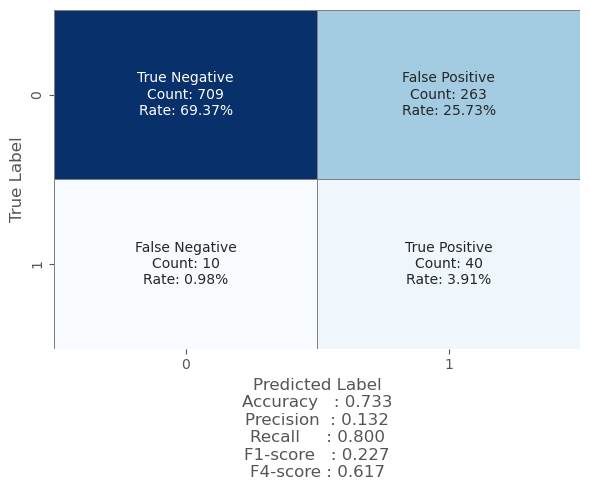


### Decision Tree – Confusion Matrix ###


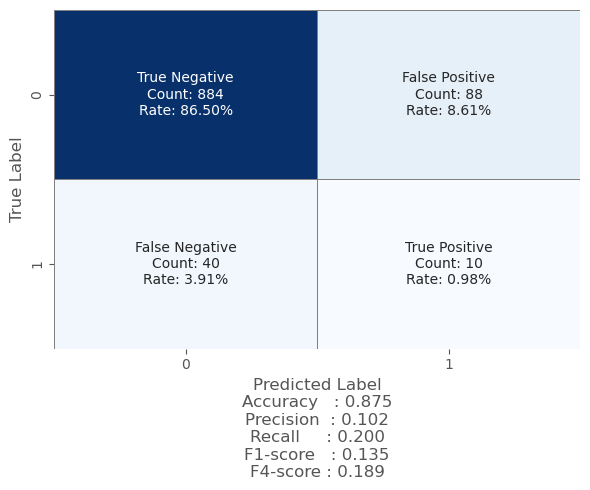


### Random Forest – Confusion Matrix ###


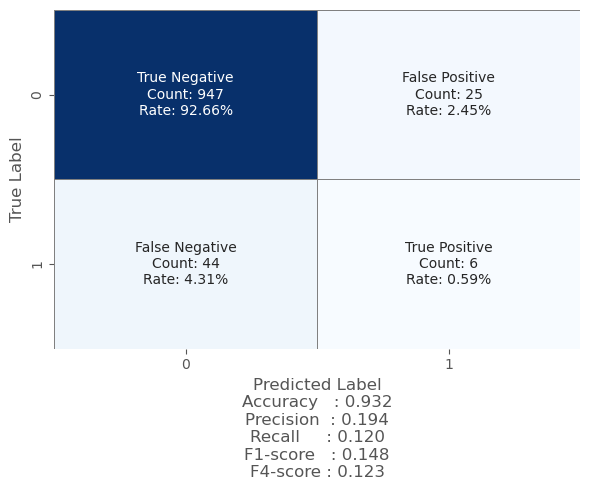


### XGBoost – Confusion Matrix ###


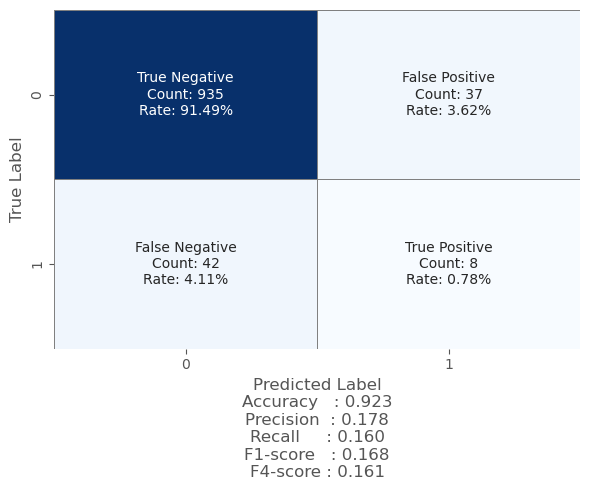

,Model,Precision,Recall,F1-Score,F4-Score,ROC-AUC
0,Logistic Regression,0.132,0.80,0.227,0.617,0.839
1,Decision Tree,0.102,0.20,0.135,0.189,0.555
3,XGBoost,0.178,0.16,0.168,0.161,0.775
2,Random Forest,0.194,0.12,0.148,0.123,0.763


In [42]:
comparison = []

beta = 4
eps = 1e-9

for name, res in results.items():
    tn, fp, fn, tp = res["cm"].ravel()

    precision = tp / (tp + fp + eps)
    recall = tp / (tp + fn + eps)

    f1 = 2 * precision * recall / (precision + recall + eps)

    fbeta = (1 + beta**2) * (precision * recall) / (
        beta**2 * precision + recall + eps
    )

    auc_score = roc_auc_score(y["test"], res["y_proba"])

    comparison.append({
        "Model": name,
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-Score": round(f1, 3),
        "F4-Score": round(fbeta, 3),
        "ROC-AUC": round(auc_score, 3)
    })

    print(f"\n### {name} – Confusion Matrix ###")
    cf_matrix_show(res["cm"], beta=4)


df_compare = (
    pd.DataFrame(comparison)
    .sort_values(by="Recall", ascending=False)
)

display(df_compare)

- Logistic Regression modeli, stroke veri setinde yüksek derecede dengesiz sınıf yapısına (%5 pozitif) rağmen yüksek recall (0.80) elde etmiştir. Bu değer, felç geçiren hastaların %80’inin model tarafından doğru şekilde tespit edildiğini göstermektedir. Stroke gibi hayati risk içeren problemlerde, yanlış negatif hataların maliyeti çok yüksek olduğundan, bu sonuç klinik tarama senaryoları için önemli bir avantaj sağlamaktadır.

- Precision değerinin 0.132 olması, modelin pozitif tahminlerinin yaklaşık %13’ünün gerçekten felç vakaları olduğunu göstermektedir. Bu durum, çok sayıda yanlış pozitif üretildiğini işaret etse de, erken tarama ve risk belirleme amaçlı sistemlerde yanlış alarm üretmenin, gerçek vakaları kaçırmaya kıyasla daha tolere edilebilir olduğu bilinmektedir.

- F4-Score (0.617) değerinin görece yüksek olması, recall’a daha fazla ağırlık verilen değerlendirme yaklaşımında modelin dengeli bir performans sunduğunu göstermektedir. Bu metrik, modelin yalnızca yüksek recall üretmediğini, aynı zamanda precision tamamen göz ardı edilmeden klinik önceliklere uygun bir denge kurduğunu ortaya koymaktadır.

- ROC-AUC değerinin 0.839 olması, modelin eşik bağımsız olarak sınıfları ayırt etme yeteneğinin güçlü olduğunu göstermekte ve elde edilen yüksek recall’ın rastgele bir tahminden kaynaklanmadığını desteklemektedir.

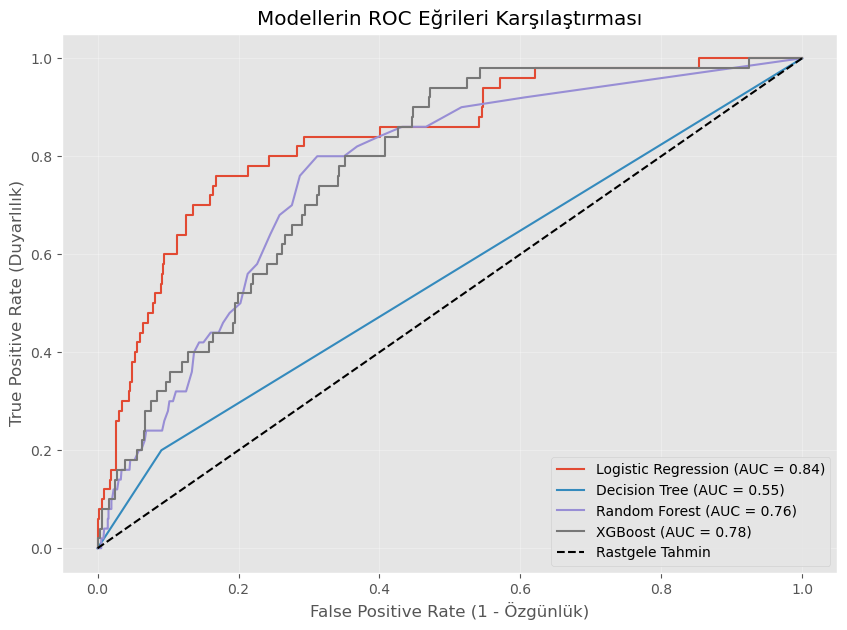

In [43]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y["test"], res["y_proba"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Rastgele Tahmin")
plt.xlabel("False Positive Rate (1 - Özgünlük)")
plt.ylabel("True Positive Rate (Duyarlılık)")
plt.title("Modellerin ROC Eğrileri Karşılaştırması")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

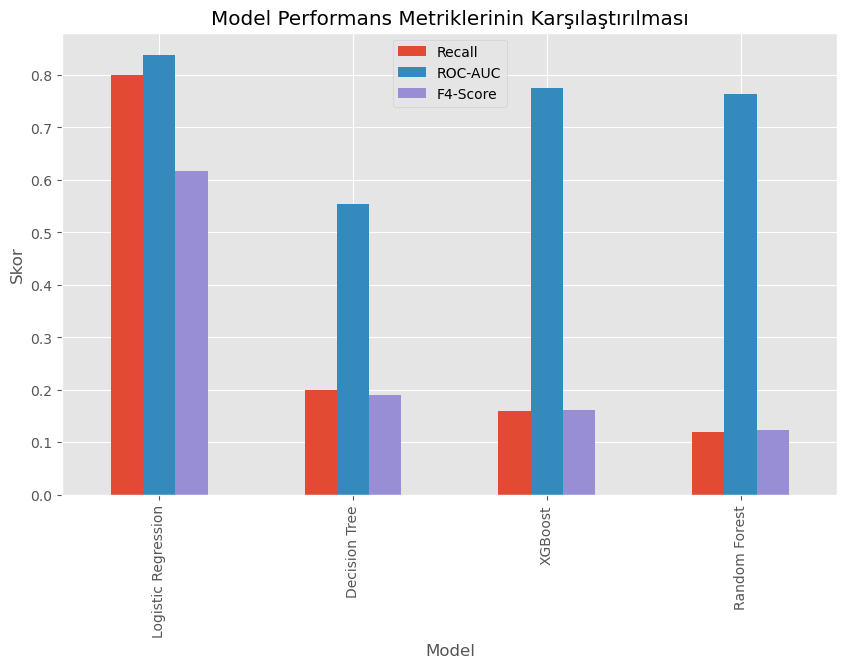

In [44]:
df_compare.set_index("Model")[["Recall", "ROC-AUC", "F4-Score"]] \
    .plot(kind="bar", figsize=(10, 6))

plt.title("Model Performans Metriklerinin Karşılaştırılması")
plt.ylabel("Skor")
plt.show()

## SONUÇ

- Logistic Regression modeli, stroke veri setindeki %5’lik pozitif sınıf oranına rağmen %80 recall ve 0.839 ROC-AUC elde etmiş; yanlış negatif hataların kritik olduğu bu problemde, düşük precision değerine karşın klinik tarama açısından uygun ve savunulabilir bir performans sunmuştur.

- Felç hastası olan kişi sınıfının veri setinde yalnızca %5 oranında temsil edilmesi, SMOTE uygulanmasına rağmen sınıflandırma model performansını sınırlayan ve zorlayan en önemli faktörlerden biridir.
  
- Literatürde çoğunlukla Random Forest algoritması tercih edilmiştir. Bu çalışmada Logistic Regression modeli kullanılmıştır. Deneysel sonuçlar, Logistic Regression’ın literatürde Random Forest ile elde edilen performans değerlerine benzer sonuçlar verdiğini göstermektedir. Ayrıca modelin yorumlanabilirliği tercih sebebi olmuştur.